<a href="https://colab.research.google.com/github/Haseeb227/Customer_Churn_prediction-using-ANN/blob/main/Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras

In [ ]:
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML Practice/Churn_Modelling.csv',encoding='latin-1')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [19]:
x = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
x_train.shape

(8000, 11)

In [21]:
x_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [46]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 672
Trainable params: 672
Non-trainable 

In [50]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [55]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3009 - accuracy: 0.8795 - val_loss: 0.3750 - val_accuracy: 0.8512
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2998 - accuracy: 0.8808 - val_loss: 0.3841 - val_accuracy: 0.8519
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.8784 - val_loss: 0.3715 - val_accuracy: 0.8531
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.8797 - val_loss: 0.3710 - val_accuracy: 0.8544
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2998 - accuracy: 0.8809 - val_loss: 0.3708 - val_accuracy: 0.8512
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3005 - accuracy: 0.8795 - val_loss: 0.3718 - val_accuracy: 0.8494
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3008 - accuracy: 0.8813 - val_loss: 0.3808 - val_accuracy: 0.8506

In [37]:
# model.layers[0].get_weights()

[array([[ 1.34544715e-01, -2.06749048e-02, -1.78843178e-03,
         -2.31028333e-01, -5.84989674e-02, -2.18066663e-01,
         -1.58542901e-01,  3.93302664e-02,  2.00615779e-01,
         -1.08727850e-01,  3.18730205e-01],
        [-4.99259830e-01,  5.20571172e-01,  4.12887394e-01,
          6.01388998e-02,  3.26249540e-01, -5.20321131e-01,
         -7.12894559e-01,  6.32167220e-01,  3.97906452e-01,
          1.84349604e-02, -6.07391000e-02],
        [-2.66887009e-01,  1.01604678e-01,  4.24326181e-01,
          1.81381419e-01,  4.27328855e-01,  7.85332248e-02,
          1.21620752e-01,  9.50665846e-02, -2.08957478e-01,
         -3.53529662e-01, -1.15228496e-01],
        [-4.30710018e-01, -4.33100700e-01, -1.55358076e-01,
          8.41086954e-02, -4.62166071e-02, -2.47605026e-01,
         -2.63822079e-01, -1.53670609e-01,  3.49177480e-01,
         -1.17782004e-01,  3.27668995e-01],
        [ 6.52054176e-02, -1.13408482e+00, -1.23799108e-01,
          9.32749927e-01,  8.80453922e-03, -

In [52]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [53]:
y_pred = np.where(y_log>0.5,1,0)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8535

In [57]:
import matplotlib.pyplot as plt

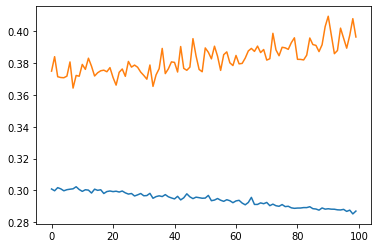

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

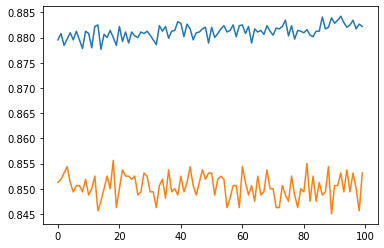

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])